In [2]:
# libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [3]:
# read in the train data
train = pd.read_csv('./train.csv')

In [4]:
# get some metadeta
print("The dataset has", train.shape, "dimensions")
print("The columns are", train.columns)
print(train.head())

('The dataset has', (1458644, 11), 'dimensions')
('The columns are', Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration'],
      dtype='object'))
          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1           -73.982           40.768            -73.965   
1                1           -73.980           40.739            -73.999   
2                1           

In [15]:
# get summaries of the numerics - can look into formatting?
?train.describe()
train.describe(percentiles = [.05, .25, .5, .75, .95, .99])

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_mins
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492,15.992
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432,87.291
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000,0.017
5%,1.000,1.000,-74.007,40.708,-74.008,40.700,180.000,3.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000,6.617
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000,11.033
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000,17.917
95%,2.000,5.000,-73.892,40.788,-73.920,40.798,2104.000,35.067
99%,2.000,6.000,-73.782,40.807,-73.790,40.837,3440.000,57.333


In [6]:
# get trip duration in minutes
train['trip_duration_mins'] = train['trip_duration'] / 60
train[['trip_duration', 'trip_duration_mins']].head()

,trip_duration,trip_duration_mins
0,455,7.583
1,663,11.050
2,2124,35.400
3,429,7.150
4,435,7.250


In [22]:
# plot on map
# plots for trip volume by variables and average speed / mins
# get haversine distance between the two points

,trip_duration,trip_duration_mins
0,455,7.583
1,663,11.050
2,2124,35.400
3,429,7.150
4,435,7.250


In [19]:
# remove trips > 1 hour
train = train.loc[train['trip_duration_mins'] < 60]
train.shape

(1446310, 12)

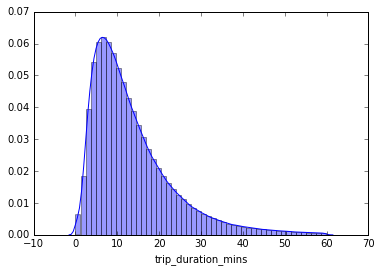

In [21]:
plt = sns.distplot(train['trip_duration_mins'])
#plt.set(ylim = 0)

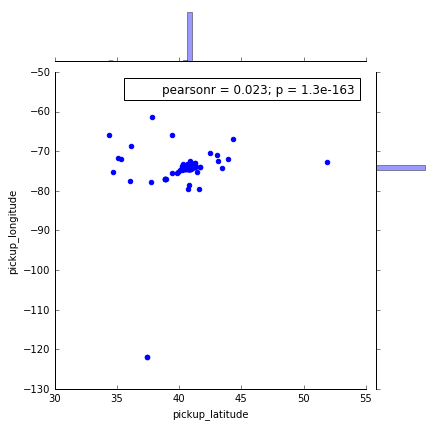

In [14]:
sns.jointplot(x = 'pickup_latitude', y = 'pickup_longitude', data = train)

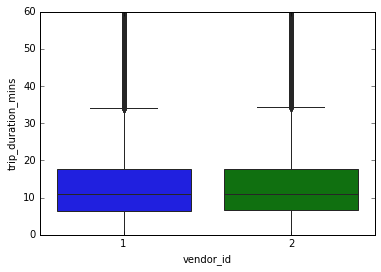

In [23]:
sns.boxplot(x = 'vendor_id', y = 'trip_duration_mins', data = train)

In [24]:
train.groupby('vendor_id')['trip_duration_mins'].mean()

vendor_id
1   13.449
2   13.597
Name: trip_duration_mins, dtype: float64

In [32]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_mins
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,7.583
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,11.050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,35.400
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,7.150
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,7.250
